<a href="https://colab.research.google.com/github/andrewm4894/netdata-community/blob/netdata-pandas-example/netdata-agent-api/netdata-pandas/dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# uncomment below to install netdata-pandas
#!pip install seaborn netdata-pandas==0.0.26

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from netdata_pandas.data import get_data

In [22]:
# inputs
hosts = ['london.my-netdata.io', 'cdn77.my-netdata.io', 'octopuscs.my-netdata.io']
charts = ['system.cpu', 'cpu.cpu0', 'cpu.cpu1', 'system.load', 'system.processes']
before = 0
after = -60*10

In [23]:
df = get_data(hosts=hosts, charts=charts, after=after, before=before)
print(df.shape)
df.head()

(1801, 32)


cpu.cpu0|guest  cpu.cpu0|guest_nice  \
host                time_idx                                          
cdn77.my-netdata.io 1603398578             0.0                  0.0   
                    1603398579             0.0                  0.0   
                    1603398580             0.0                  0.0   
                    1603398581             0.0                  0.0   
                    1603398582             0.0                  0.0   

                                cpu.cpu0|iowait  cpu.cpu0|irq  cpu.cpu0|nice  \
host                time_idx                                                   
cdn77.my-netdata.io 1603398578              0.0           0.0            0.0   
                    1603398579              0.0           0.0            0.0   
                    1603398580              0.0           0.0            0.0   
                    1603398581              0.0           0.0            0.0   
                    1603398582              0.0           0.0            0.0   

                                cpu.cpu0|softirq  cpu.cpu0|steal  \
host                time_idx                                       
cdn77.my-netdata.io 1603398578               0.0             0.0   
                    1603398579               0.0             0.0   
                    1603398580               0.0             0.0   
                    1603398581               0.0             0.0   
                    1603398582               0.0             0.0   

                                cpu.cpu0|system  cpu.cpu0|user  \
host                time_idx                                     
cdn77.my-netdata.io 1603398578         1.020408       1.020408   
                    1603398579         1.000000       1.000000   
                    1603398580         1.020408       1.020408   
                    1603398581         3.061224       1.020408   
                    1603398582         1.030928       0.000000   

                                cpu.cpu1|guest  ...  system.cpu|nice  \
host                time_idx                    ...                    
cdn77.my-netdata.io 1603398578             0.0  ...              0.0   
                    1603398579             0.0  ...              0.0   
                    1603398580             0.0  ...              0.0   
                    1603398581             0.0  ...              0.0   
                    1603398582             0.0  ...              0.0   

                                system.cpu|softirq  system.cpu|steal  \
host                time_idx                                           
cdn77.my-netdata.io 1603398578                 0.0               0.0   
                    1603398579                 0.0               0.0   
                    1603398580                 0.0               0.0   
                    1603398581                 0.0               0.0   
                    1603398582                 0.0               0.0   

                                system.cpu|system  system.cpu|user  \
host                time_idx                                         
cdn77.my-netdata.io 1603398578           2.040816         0.510204   
                    1603398579           1.515151         1.010101   
                    1603398580           1.515151         0.505050   
                    1603398581           3.030303         1.010101   
                    1603398582           1.522843         0.507614   

                                system.load|load1  system.load|load15  \
host                time_idx                                            
cdn77.my-netdata.io 1603398578                NaN                 NaN   
                    1603398579                NaN                 NaN   
                    1603398580               0.28                0.64   
                    1603398581               0.28                0.64   
                    1603398582               0.28                0.64   

                    

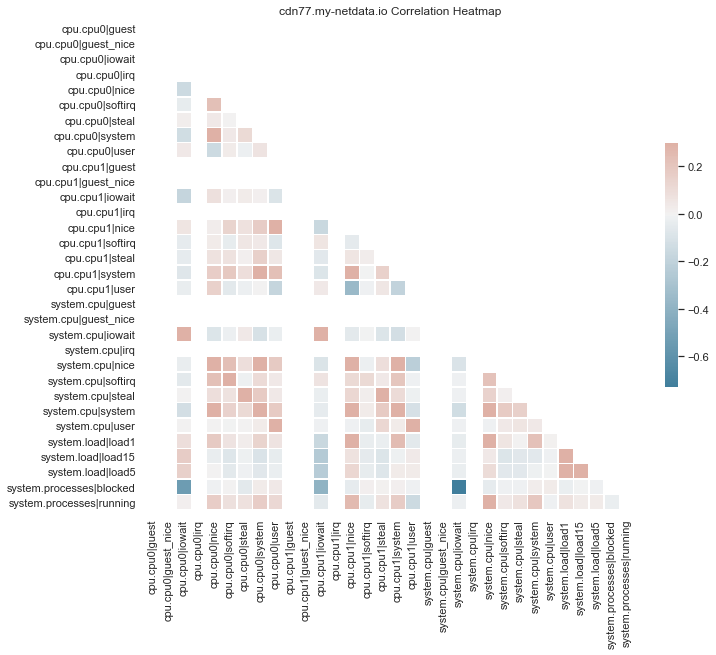

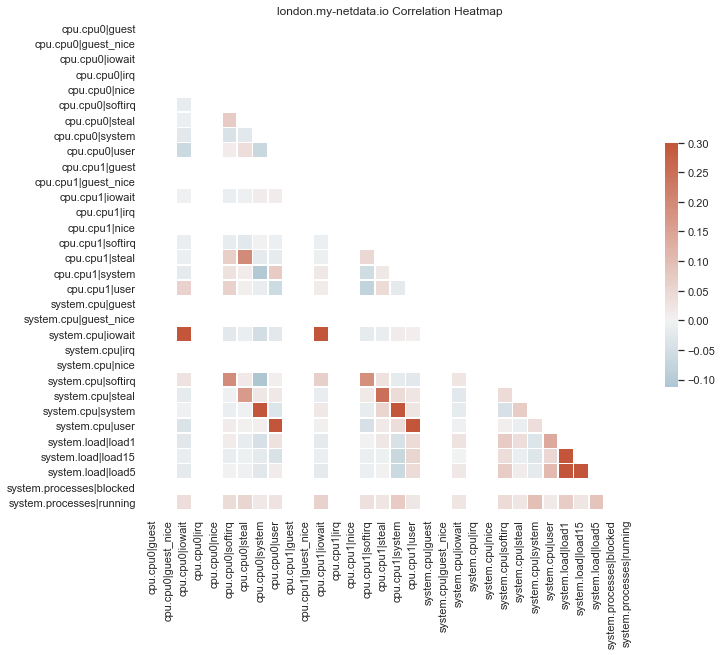

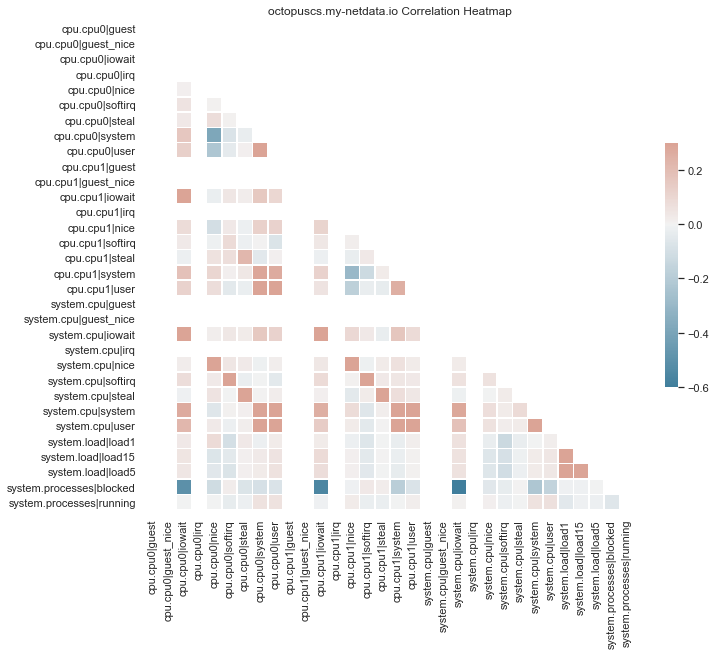

In [24]:
for host in df.index.unique(0):
    sns.set_theme(style="white")
    corr = df.loc[host].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(
        corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
        square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title(f'{host} Correlation Heatmap')